# Import Libraries

In [7]:
import tensorflow as tf
import keras
from keras import optimizers, metrics, losses, callbacks, regularizers
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, load_model
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import joblib
from pathlib import Path

# Load data

In [173]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [174]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [175]:
train_x, test_x = train_x / 255., test_x / 255.

In [176]:
models = {}
models_history = {}
results = {}

# Train

## Function for train

In [2]:
def save_all_model():
    for name, model in models.items():
        print(f'Save {name}')
        save_model(name, model, models_history['name'])

def save_model(name, model, history):
    filepath=Path(f'Models\\Hyperparameter_Tuning\\{name}_model.keras')
    model.save(filepath)
    joblib.dump(history, f'Models\\Hyperparameter_Tuning\\{name}_history.pkl')

def get_callbacks(name):
    early_stopping_acc = callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        verbose=1,
        restore_best_weights=True
    )
    early_stopping_loss = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        verbose=1,
        start_from_epoch=4
    )
    return [early_stopping_acc, early_stopping_loss]

def compile_and_fit(model, name, batch_size=512, max_epochs=100, optimizer=None):
    
    if optimizer is None:
        optimizer = optimizers.Adam()

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()
    history = model.fit(
        train_x,
        train_y,
        epochs = max_epochs,
        batch_size=batch_size,
        validation_split = 0.2,
        callbacks = get_callbacks(name)
    )
    save_model(name, model, history)

    return history

## Base model

In [178]:
model_name = 'Model_1'

models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name=model_name)

In [179]:
models_history[model_name] = compile_and_fit(models[model_name], model_name)

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_36 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6285 - loss: 1.1413 - val_accuracy: 0.8258 - val_loss: 0.5020
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4782 - val_accuracy: 0.8414 - val_loss: 0.4505
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.4220 - val_accuracy: 0.8537 - val_loss: 0.4070
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3849 - val_accuracy: 0.8619 - val_loss: 0.3852
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8710 - loss: 0.3624 - val_accuracy: 0.8662 - val_loss: 0.3793
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.3423 - val_accuracy: 0.8719 - val_loss: 0.3602
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 0.3245 - val_accuracy: 0.8753 - val_loss: 0.3497
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8851 - loss: 0.3150 - val_accuracy: 0.8725 - v

In [180]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8884 - loss: 0.3474


## Leaky relu activation

In [181]:
model_name = 'Model_2_leaky_relu'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='leaky_relu'),
    Dense(64, activation='leaky_relu'),
    Dense(10, activation='softmax')
], name=model_name)

In [182]:
models_history[model_name] = compile_and_fit(models[model_name], model_name)

Model: "Model_2_leaky_relu"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6300 - loss: 1.0973 - val_accuracy: 0.8282 - val_loss: 0.4961
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.4767 - val_accuracy: 0.8445 - val_loss: 0.4424
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.4211 - val_accuracy: 0.8584 - val_loss: 0.4081
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8629 - loss: 0.3932 - val_accuracy: 0.8593 - val_loss: 0.4018
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8656 - loss: 0.3757 - val_accuracy: 0.8611 - val_loss: 0.3854
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8714 - loss: 0.3624 - val_accuracy: 0.8658 - val_loss: 0.3740
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8824 - loss: 0.3398 - val_accuracy: 0.8680 - val_loss: 0.3712
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8813 - loss: 0.3331 - val_accuracy: 0.8723 - v

In [183]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 0.3533


## Change batch size

In [184]:
model_name = 'Model_batch_128'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name=model_name)

models_history[model_name] = compile_and_fit(models[model_name], model_name, batch_size=128, max_epochs=50)

Model: "Model_batch_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7209 - loss: 0.8152 - val_accuracy: 0.8477 - val_loss: 0.4287
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8503 - loss: 0.4241 - val_accuracy: 0.8615 - val_loss: 0.3921
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3638 - val_accuracy: 0.8752 - val_loss: 0.3534
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.3288 - val_accuracy: 0.8719 - val_loss: 0.3498
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8833 - loss: 0.3184 - val_accuracy: 0.8818 - val_loss: 0.3279
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8933 - loss: 0.2917 - val_accuracy: 0.8828 - val_loss: 0.3311
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2800 - val_accuracy: 0.8781 - val_loss: 0.3365
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9002 - loss: 0.2704 - val_accuracy: 0.

In [185]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8813 - loss: 0.3596


## Change optimizers

In [186]:
model_name = 'Model_SGD_optimizer'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name=model_name)

history = compile_and_fit(models[model_name], model_name, optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))


Model: "Model_SGD_optimizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3130 - loss: 2.0387 - val_accuracy: 0.6242 - val_loss: 1.3871
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6434 - loss: 1.2812 - val_accuracy: 0.6871 - val_loss: 1.0269
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6836 - loss: 0.9991 - val_accuracy: 0.7113 - val_loss: 0.8772
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7091 - loss: 0.8690 - val_accuracy: 0.7260 - val_loss: 0.7968
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7323 - loss: 0.7898 - val_accuracy: 0.7499 - val_loss: 0.7420
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7524 - loss: 0.7375 - val_accuracy: 0.7650 - val_loss: 0.7006
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7645 - loss: 0.6993 - val_accuracy: 0.7738 - val_loss: 0.6699
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7772 - loss: 0.6678 - val_accuracy: 0.7807 - v

In [187]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8560 - loss: 0.4108  


## Dropout

In [188]:
model_name = 'Model_with_Dropout'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
], name=model_name)

models_history[model_name] = compile_and_fit(models[model_name], model_name)

Model: "Model_with_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_40 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3968 - loss: 1.6874 - val_accuracy: 0.7800 - val_loss: 0.6405
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7159 - loss: 0.8072 - val_accuracy: 0.8189 - val_loss: 0.5273
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7692 - loss: 0.6618 - val_accuracy: 0.8350 - val_loss: 0.4620
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7980 - loss: 0.5899 - val_accuracy: 0.8421 - val_loss: 0.4302
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077 - loss: 0.5489 - val_accuracy: 0.8495 - val_loss: 0.4136
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8201 - loss: 0.5242 - val_accuracy: 0.8553 - val_loss: 0.4000
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8264 - loss: 0.5058 - val_accuracy: 0.8546 - val_loss: 0.3967
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8348 - loss: 0.4859 - val_accuracy: 0.8621 - v

In [189]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8766 - loss: 0.3555


## Kernel regularizer

In [190]:
model_name = 'Model_L2_regularization'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='softmax')
], name=model_name)

models_history[model_name] = compile_and_fit(models[model_name], model_name)

Model: "Model_L2_regularization"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_41 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6410 - loss: 3.4024 - val_accuracy: 0.8138 - val_loss: 1.4543
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 1.3053 - val_accuracy: 0.8253 - val_loss: 0.9941
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8273 - loss: 0.9496 - val_accuracy: 0.8259 - val_loss: 0.8468
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.8244 - val_accuracy: 0.8231 - val_loss: 0.7920
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.7647 - val_accuracy: 0.8327 - val_loss: 0.7337
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.7239 - val_accuracy: 0.8325 - val_loss: 0.7081
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8373 - loss: 0.6965 - val_accuracy: 0.8278 - val_loss: 0.6949
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8345 - loss: 0.6790 - val_accuracy: 0.8313 - v

In [191]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.5131


## More neurons

In [192]:
model_name = 'Model_512_neurons'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
], name=model_name)

models_history[model_name] = compile_and_fit(models[model_name], model_name)

Model: "Model_512_neurons"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_42 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7114 - loss: 0.8607 - val_accuracy: 0.8378 - val_loss: 0.4666
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8588 - loss: 0.4057 - val_accuracy: 0.8695 - val_loss: 0.3709
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8734 - loss: 0.3578 - val_accuracy: 0.8638 - val_loss: 0.3736
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8810 - loss: 0.3233 - val_accuracy: 0.8792 - val_loss: 0.3344
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8893 - loss: 0.2987 - val_accuracy: 0.8788 - val_loss: 0.3370
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8986 - loss: 0.2782 - val_accuracy: 0.8817 - val_loss: 0.3222
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9001 - loss: 0.2681 - val_accuracy: 0.8858 - val_loss: 0.3207
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9060 - loss: 0.2555 - val_accuracy: 0.

In [193]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.3394


## Final model

In [194]:
model_name = 'Model_Final'
models[model_name] = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
], name=model_name)

models_history[model_name] = compile_and_fit(models[model_name], model_name, batch_size=64)

Model: "Model_Final"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_43 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7388 - loss: 0.7160 - val_accuracy: 0.8501 - val_loss: 0.4173
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8486 - loss: 0.4117 - val_accuracy: 0.8633 - val_loss: 0.3789
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8624 - loss: 0.3703 - val_accuracy: 0.8720 - val_loss: 0.3506
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8692 - loss: 0.3518 - val_accuracy: 0.8779 - val_loss: 0.3372
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8774 - loss: 0.3313 - val_accuracy: 0.8692 - val_loss: 0.3527
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8808 - loss: 0.3141 - val_accuracy: 0.8840 - val_loss: 0.3190
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8885 - loss: 0.3012 - val_accuracy: 0.8781 - val_loss: 0.3421
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8883 - loss: 0.2978 - val_accu

In [195]:
results[model_name] = models[model_name].evaluate(test_x, test_y, verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8905 - loss: 0.3430


In [196]:
models_history

{'Model_1': <keras.src.callbacks.history.History at 0x1a7f9673050>,
 'Model_2_leaky_relu': <keras.src.callbacks.history.History at 0x1a7e9533620>,
 'Model_batch_128': <keras.src.callbacks.history.History at 0x1a81fbe1760>,
 'Model_with_Dropout': <keras.src.callbacks.history.History at 0x1a820083bf0>,
 'Model_L2_regularization': <keras.src.callbacks.history.History at 0x1a7f761cd10>,
 'Model_512_neurons': <keras.src.callbacks.history.History at 0x1a8208e61e0>,
 'Model_Final': <keras.src.callbacks.history.History at 0x1a8207f92b0>}

In [197]:
results

{'Model_1': [0.3473023474216461, 0.8884000182151794],
 'Model_2_leaky_relu': [0.3464300334453583, 0.8794000148773193],
 'Model_batch_128': [0.36337003111839294, 0.8824999928474426],
 'Model_SGD_optimizer': [0.41710638999938965, 0.8511000275611877],
 'Model_with_Dropout': [0.36124029755592346, 0.8759999871253967],
 'Model_L2_regularization': [0.5175725221633911, 0.8568000197410583],
 'Model_512_neurons': [0.33928608894348145, 0.8895999789237976],
 'Model_Final': [0.34209737181663513, 0.8910999894142151]}

In [198]:
joblib.dump(results, 'Models\\Hyperparameter_Tuning\\results.plk')

['Models\\Hyperparameter_Tuning\\results.plk']

# Visualization 

In [11]:
results = joblib.load('Models\\Hyperparameter_Tuning\\results.plk')
models_history = {}
models = {}

In [12]:
def load_all_model():
    for name in results.keys():
        print(f'Load {name}')
        models_history[name] = joblib.load(f'Models\\Hyperparameter_Tuning\\{name}_history.pkl')
        models[name] = load_model(f'Models\\Hyperparameter_Tuning\\{name}_model.keras')

In [13]:
load_all_model()

Load Model_1
Load Model_2_leaky_relu
Load Model_batch_128
Load Model_SGD_optimizer
Load Model_with_Dropout
Load Model_L2_regularization
Load Model_512_neurons
Load Model_Final


In [17]:
models_history

{'Model_1': <keras.src.callbacks.history.History at 0x1fbabf45ee0>,
 'Model_2_leaky_relu': <keras.src.callbacks.history.History at 0x1fbac1af5f0>,
 'Model_batch_128': <keras.src.callbacks.history.History at 0x1fbac1db620>,
 'Model_SGD_optimizer': <keras.src.callbacks.history.History at 0x1fbac231040>,
 'Model_with_Dropout': <keras.src.callbacks.history.History at 0x1fbac2c7d70>,
 'Model_L2_regularization': <keras.src.callbacks.history.History at 0x1fb92eb3200>,
 'Model_512_neurons': <keras.src.callbacks.history.History at 0x1fbac2c8080>,
 'Model_Final': <keras.src.callbacks.history.History at 0x1fbabdefb30>}

In [28]:
def plot_history(history, model_name):

    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)
    acc = history.history.get('accuracy', None)
    val_acc = history.history.get('val_accuracy', None)

    epochs = range(1, len(loss) + 1)
    

    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, color='b', label='Training loss')
    plt.plot(epochs, val_loss, color='y', label='Validation loss')
    plt.title(f'Training and Validation Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, color='b', label='Training accuracy')
    plt.plot(epochs, val_acc, color='y', label='Validation accuracy')
    plt.title(f'Training and Validation Accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

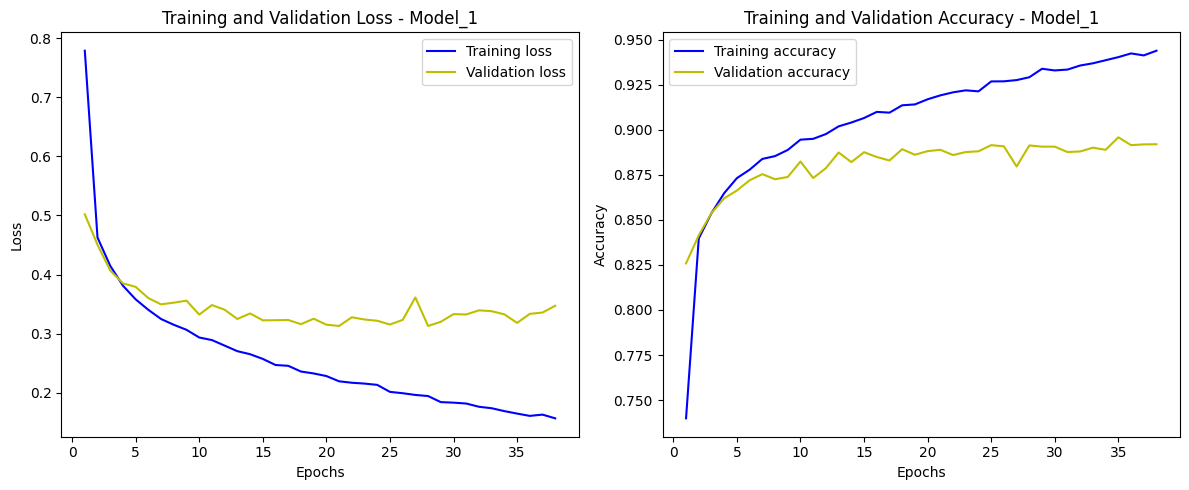

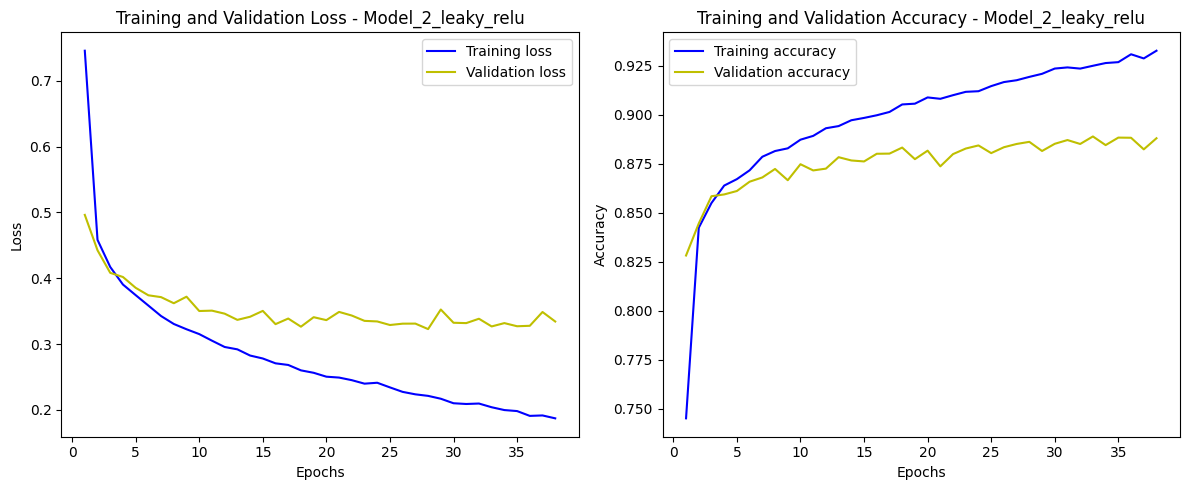

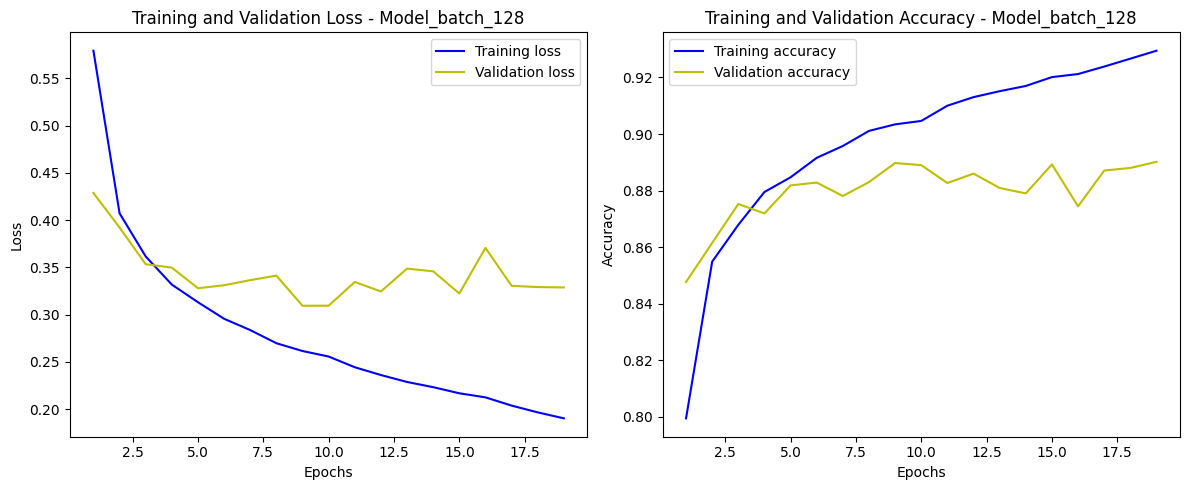

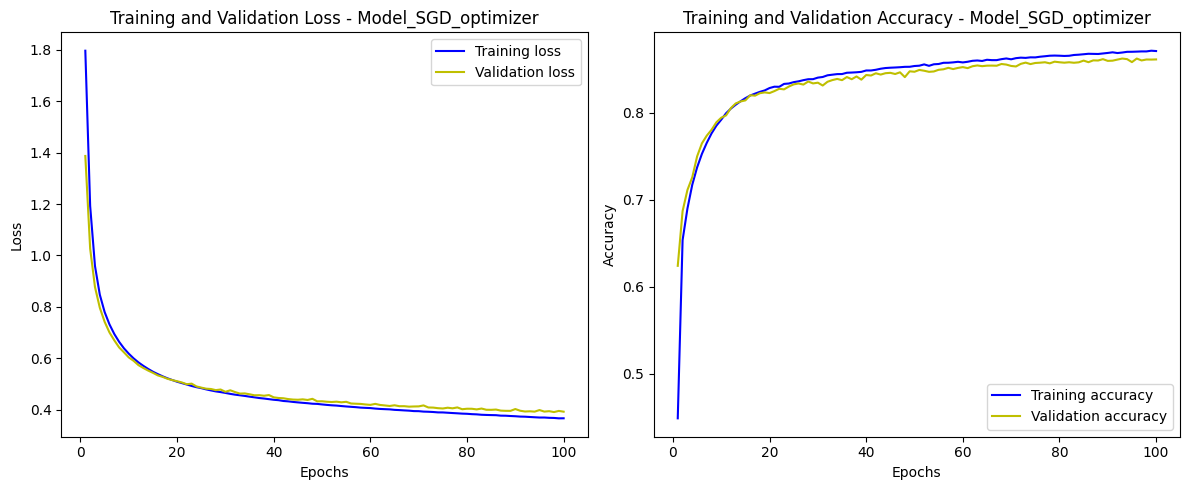

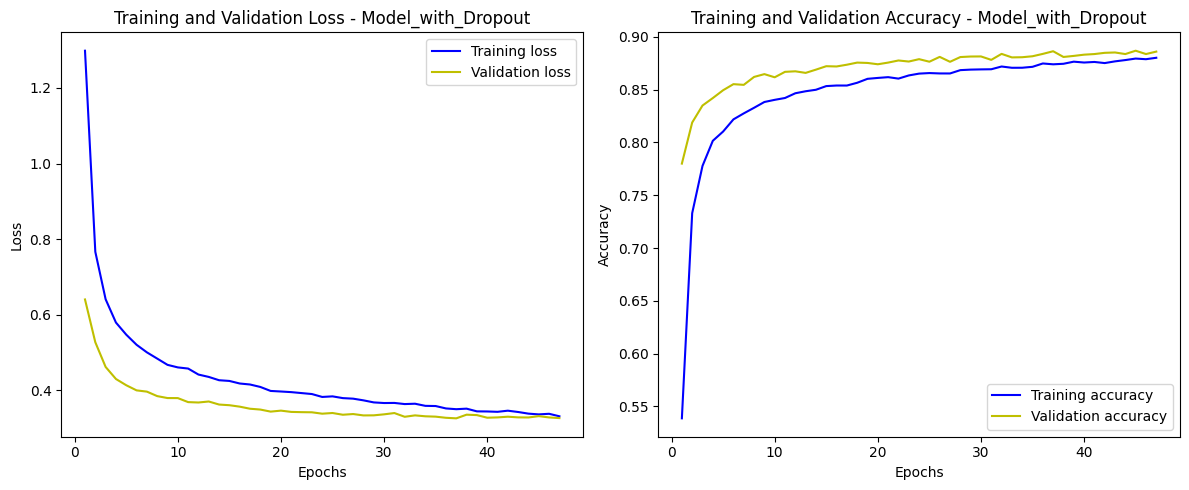

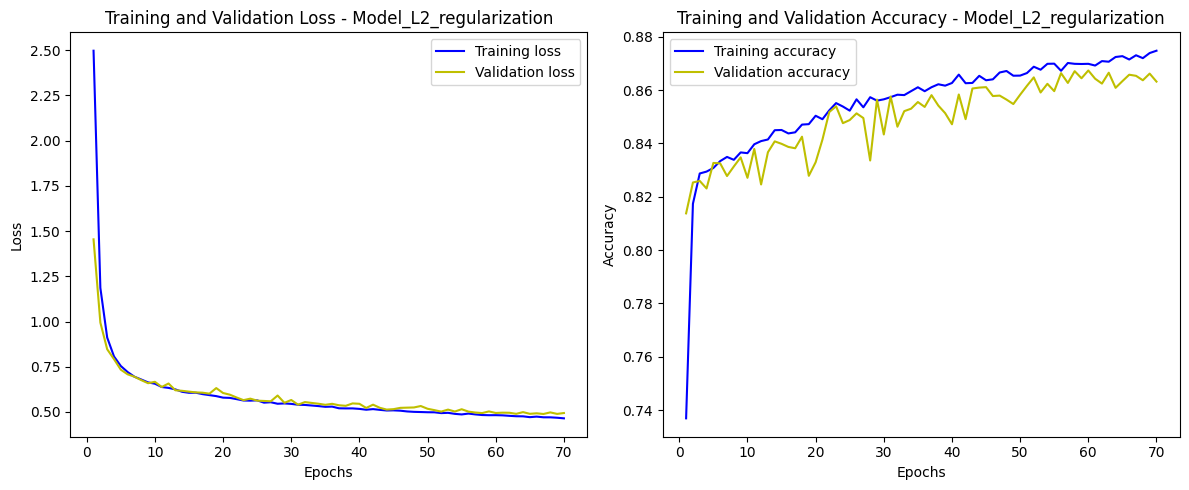

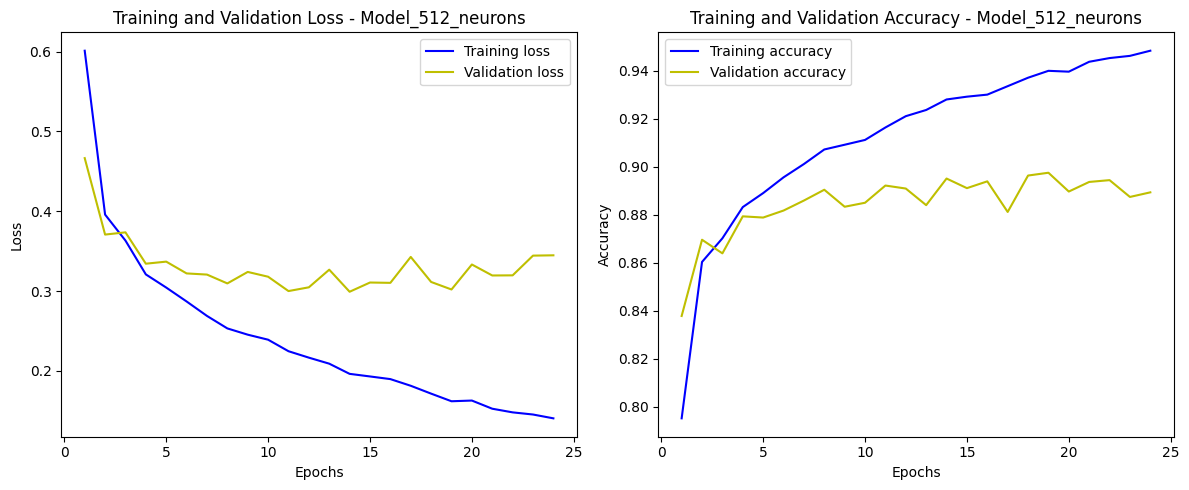

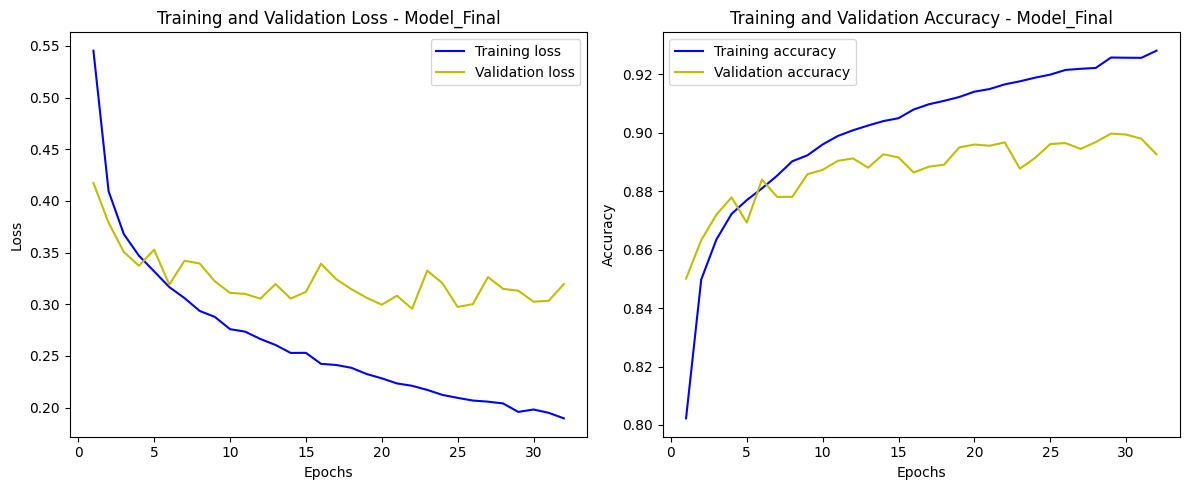

In [29]:
for model_name, history in models_history.items():
    plot_history(history, model_name)

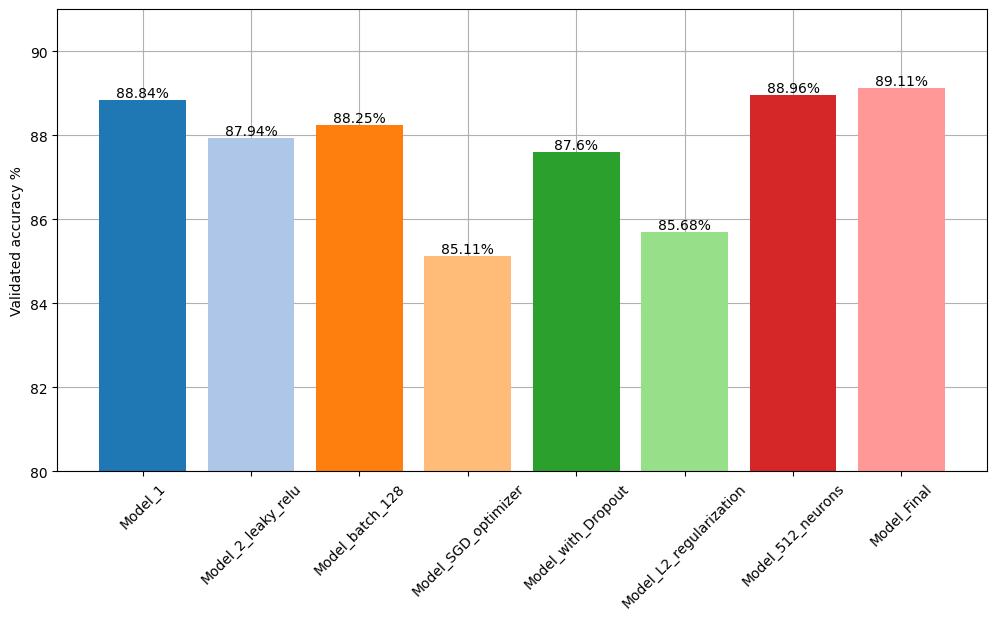

In [33]:
bar_y = [ results[m][1]*100 for m in results]

plt.figure(figsize=(12,6))
plt.grid()
plt.gca().set_axisbelow(True)
colors = range(len(models))
bars = plt.bar(x=models.keys(), height=bar_y, color=plt.cm.tab20(colors))
for bar, value in zip(bars, bar_y):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.4}%", ha='center', va='bottom')

plt.ylim(80,91)
plt.xticks(rotation=45)
plt.ylabel("Validated accuracy %")
plt.show()